In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import shap
import seaborn as sns

c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df4 = pd.read_csv('../df_cleaned.csv')

In [3]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df4.drop('index', axis=1, inplace=True)

In [7]:
train_end = df4[0:732]
test_end = df4[(916-184):]

In [8]:
train_end.replace('<NA>', np.nan, inplace=True)

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\498003558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_end.replace('<NA>', np.nan, inplace=True)


In [9]:
test_end.replace('<NA>', np.nan, inplace=True)

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\513203758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_end.replace('<NA>', np.nan, inplace=True)


In [10]:
# Calcular el número de valores NaN por cada fila
num_nans_per_row = train_end.isnull().sum(axis=1)

# Determinar el número de filas que tienen 5 o más NaNs
num_rows_with_5_or_more_nans = (num_nans_per_row >= 6).sum()

print(f'Número de pacientes con NaN en al menos 5 de las variables: {num_rows_with_5_or_more_nans}')


Número de pacientes con NaN en al menos 5 de las variables: 2


In [11]:
# Calcular el número de valores NaN por cada fila
num_nans_per_row = test_end.isnull().sum(axis=1)

# Determinar el número de filas que tienen 5 o más NaNs
num_rows_with_5_or_more_nans = (num_nans_per_row >= 5).sum()

print(f'Número de pacientes con NaN en al menos 5 de las variables: {num_rows_with_5_or_more_nans}')


Número de pacientes con NaN en al menos 5 de las variables: 10


In [12]:
train_end.isnull().sum()

age           0
sex           0
cp            0
trestbps     47
chol         21
fbs          66
restecg       0
thalach      44
exang        44
oldpeak      49
slope       247
label         0
dtype: int64

In [13]:
test_end.isnull().sum()

age           0
sex           0
cp            0
trestbps     12
chol          9
fbs          23
restecg       2
thalach      11
exang        11
oldpeak      13
slope        61
label       184
dtype: int64

## AGE

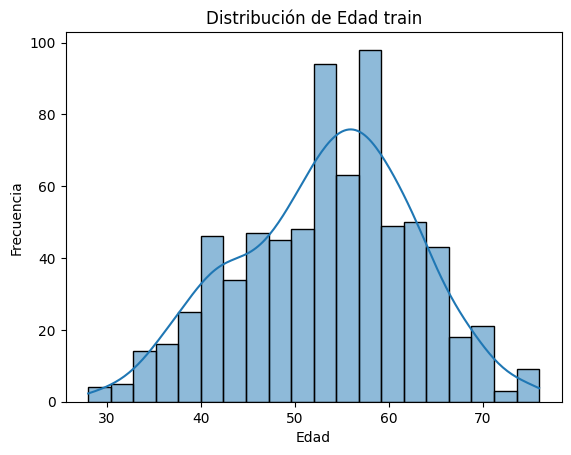

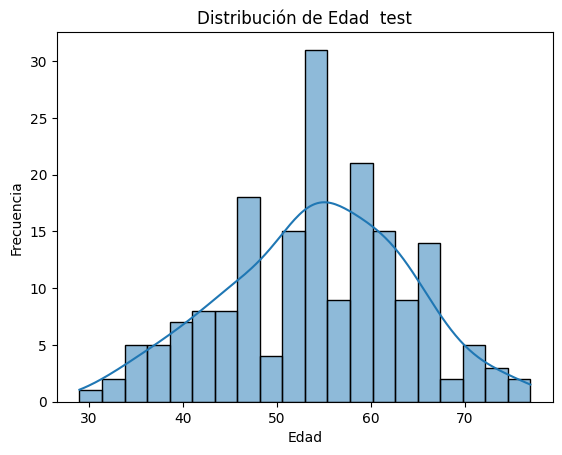

In [14]:
sns.histplot(train_end['age'], bins=20, kde=True) # kde=True añade una línea de densidad
plt.title('Distribución de Edad train')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
sns.histplot(test_end['age'], bins=20, kde=True) # kde=True añade una línea de densidad
plt.title('Distribución de Edad  test')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## SEX


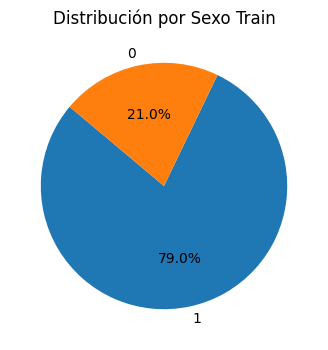

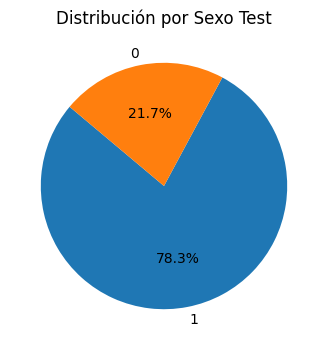

In [15]:
sex_counts = train_end['sex'].value_counts()
plt.figure(figsize=(4, 4))  
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Sexo Train')
plt.show()



sex_counts = test_end['sex'].value_counts()
plt.figure(figsize=(4, 4))  
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Sexo Test' )
plt.show()

## CP

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\981436027.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Angina Típica', 'Angina Atípica', 'Dolor No-Anginoso', 'Asintomático'])


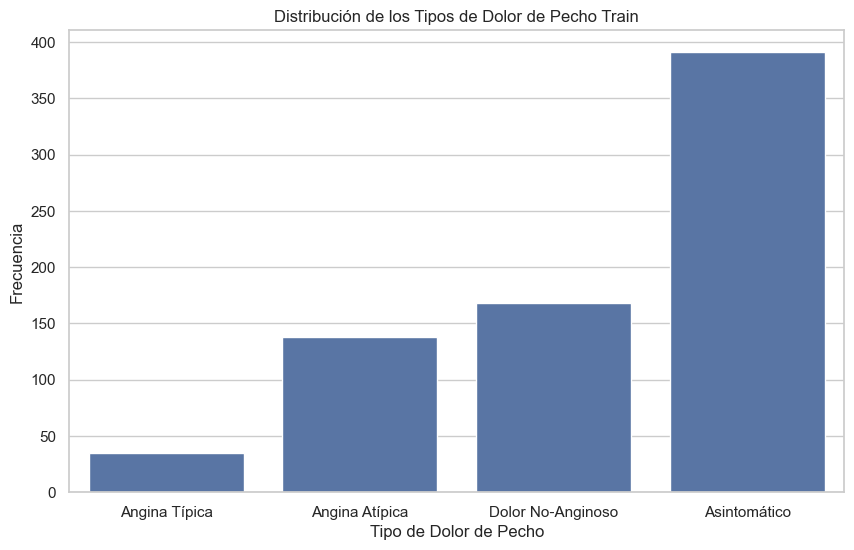

In [16]:
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='cp', data=train_end)

# Configuramos los títulos y etiquetas
ax.set_title('Distribución de los Tipos de Dolor de Pecho Train')
ax.set_xlabel('Tipo de Dolor de Pecho')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Angina Típica', 'Angina Atípica', 'Dolor No-Anginoso', 'Asintomático']) 

# Mostramos el gráfico
plt.show()


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2289336924.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Angina Típica', 'Angina Atípica', 'Dolor No-Anginoso', 'Asintomático'])


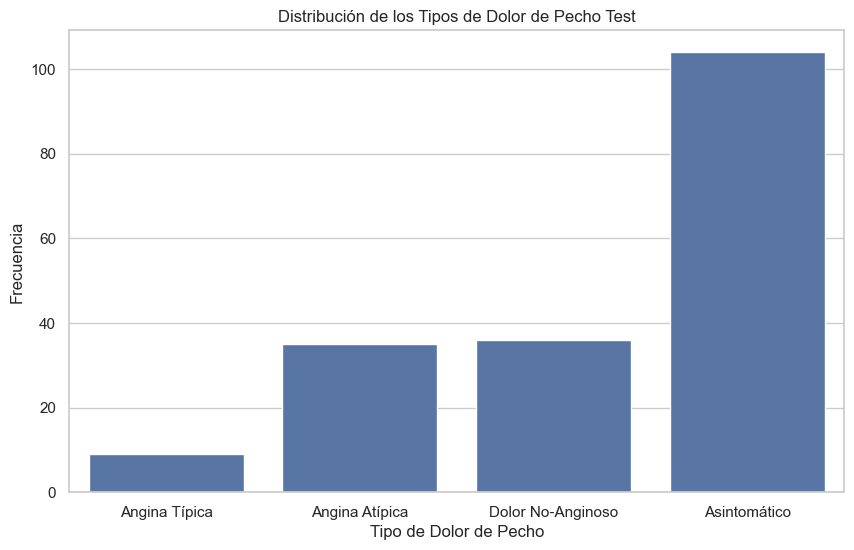

In [17]:
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6)) 
ax1 = sns.countplot(x='cp', data=test_end)

# Configuramos los títulos y etiquetas
ax1.set_title('Distribución de los Tipos de Dolor de Pecho Test')
ax1.set_xlabel('Tipo de Dolor de Pecho')
ax1.set_ylabel('Frecuencia')
ax1.set_xticklabels(['Angina Típica', 'Angina Atípica', 'Dolor No-Anginoso', 'Asintomático']) 

# Mostramos el gráfico
plt.show()



## TRESTBPS

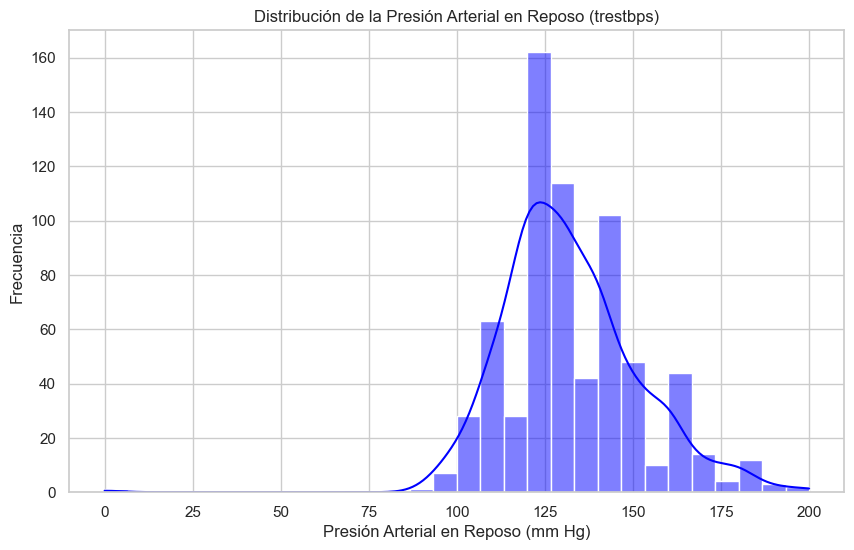

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el histograma
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
sns.histplot(data=train_end, x='trestbps', bins=30, kde=True, color='blue')

# Configuramos los títulos y etiquetas
plt.title('Distribución de la Presión Arterial en Reposo (trestbps)')
plt.xlabel('Presión Arterial en Reposo (mm Hg)')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()


In [19]:
# Filtrar las filas donde 'trestbps' es mayor o igual a 0 y menor o igual a 30
filtered_values = train_end[(train_end['trestbps'] >= 0) & (train_end['trestbps'] <= 30)]

# Mostrar los resultados
print(filtered_values)



     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
593   55    1   3       0.0   0.0  0.0      0.0    155.0    0.0      1.5   

     slope  label  
593    2.0    3.0  


In [20]:
# Eliminar filas donde 'trestbps' es numéricamente inferior a 25, manteniendo 'NaN'
train_end = train_end[(train_end['trestbps'] >= 25) | (train_end['trestbps'].isnull())]



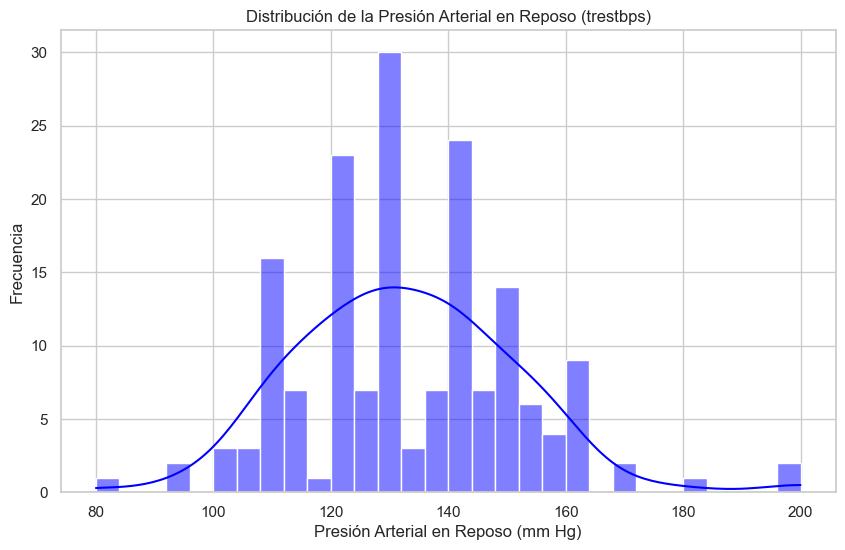

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el histograma
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
sns.histplot(data=test_end, x='trestbps', bins=30, kde=True, color='blue')

# Configuramos los títulos y etiquetas
plt.title('Distribución de la Presión Arterial en Reposo (trestbps)')
plt.xlabel('Presión Arterial en Reposo (mm Hg)')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

## CHOL

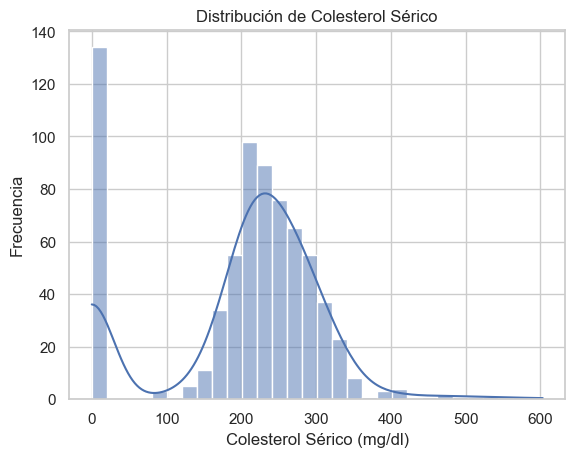

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_end['chol'].dropna(), kde=True)

plt.title('Distribución de Colesterol Sérico')
plt.xlabel('Colesterol Sérico (mg/dl)')
plt.ylabel('Frecuencia')
plt.show()


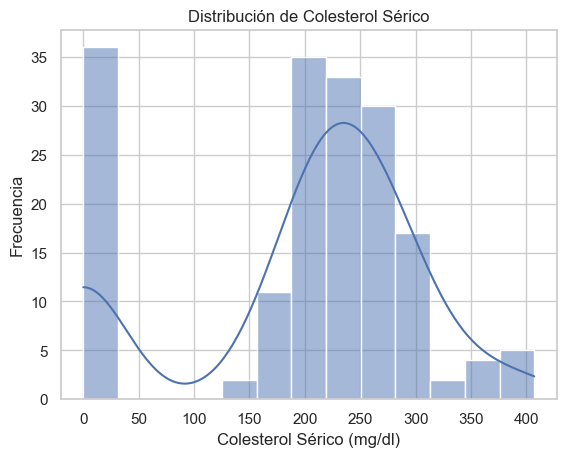

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que los valores NaN no afecten la visualización
# Si deseas excluir los NaN, asegúrate de que estén siendo manejados
sns.histplot(test_end['chol'].dropna(), kde=True)

plt.title('Distribución de Colesterol Sérico')
plt.xlabel('Colesterol Sérico (mg/dl)')
plt.ylabel('Frecuencia')
plt.show()


In [24]:
# Paso 1: Calcular la media de 'chol' excluyendo los valores 0
chol_mean = train_end['chol'][train_end['chol'] != 0].mean()

# Paso 2: Reemplazar los valores 0 en 'chol' con esa media
train_end['chol'].replace(0, chol_mean, inplace=True)

In [25]:
# Paso 1: Calcular la media de 'chol' excluyendo los valores 0
chol_mean = test_end['chol'][test_end['chol'] != 0].mean()

# Paso 2: Reemplazar los valores 0 en 'chol' con esa media
test_end['chol'].replace(0, chol_mean, inplace=True)

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3463227684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_end['chol'].replace(0, chol_mean, inplace=True)


In [26]:
train_end.isnull().sum()

age           0
sex           0
cp            0
trestbps     47
chol         21
fbs          66
restecg       0
thalach      44
exang        44
oldpeak      49
slope       247
label         0
dtype: int64

In [27]:
# Ajustar los valores de 'chol' para que estén en el rango [100, 400]
train_end['chol'] = train_end['chol'].apply(lambda x: min(max(x, 100), 400))


In [28]:
# Ajustar los valores de 'chol' para que estén en el rango [100, 400]
test_end['chol'] = test_end['chol'].apply(lambda x: min(max(x, 100), 400))


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\988831204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_end['chol'] = test_end['chol'].apply(lambda x: min(max(x, 100), 400))


## FBS

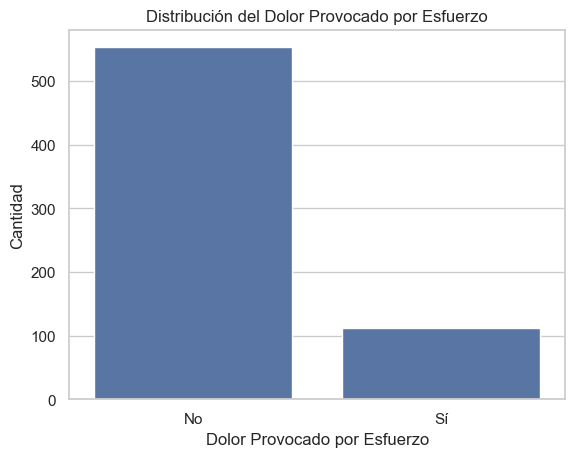

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='fbs', data=train_end)

# Añadir título y etiquetas para hacer el gráfico más informativo
plt.title('Distribución del Dolor Provocado por Esfuerzo')
plt.xlabel('Dolor Provocado por Esfuerzo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])  # Ajusta según tus datos

# Mostrar el gráfico
plt.show()


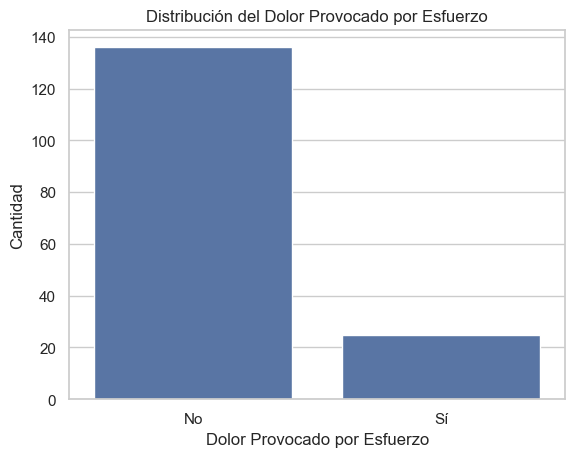

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fbs', data=test_end)

# Añadir título y etiquetas para hacer el gráfico más informativo
plt.title('Distribución del Dolor Provocado por Esfuerzo')
plt.xlabel('Dolor Provocado por Esfuerzo')
plt.ylabel('Cantidad')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])  # Ajusta según tus datos

# Mostrar el gráfico
plt.show()


## restecg

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3422884690.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='restecg', data=train_end, palette='Set2')
C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3422884690.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Anormalidad Onda ST-T', 'Hipertrofia Ventricular Izq.'])  # Etiquetas personalizadas


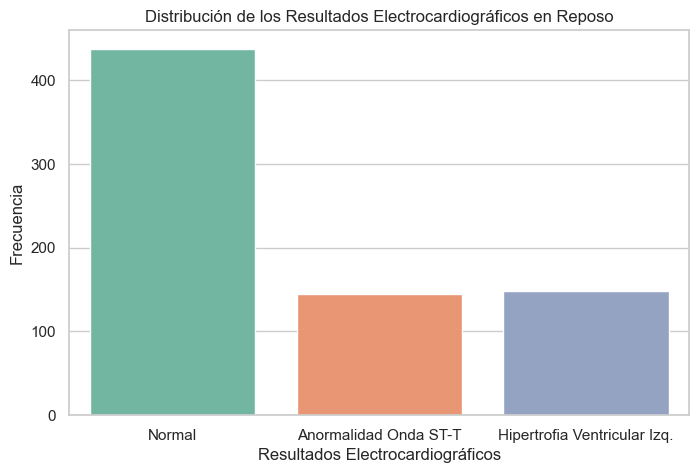

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(8, 5))  # Ajustamos el tamaño del gráfico
ax = sns.countplot(x='restecg', data=train_end, palette='Set2')

# Configuramos los títulos y etiquetas
ax.set_title('Distribución de los Resultados Electrocardiográficos en Reposo')
ax.set_xlabel('Resultados Electrocardiográficos')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Normal', 'Anormalidad Onda ST-T', 'Hipertrofia Ventricular Izq.'])  # Etiquetas personalizadas

# Mostrar el gráfico
plt.show()


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3687712753.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='restecg', data=test_end, palette='Set2')
C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3687712753.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal', 'Anormalidad Onda ST-T', 'Hipertrofia Ventricular Izq.'])  # Etiquetas personalizadas


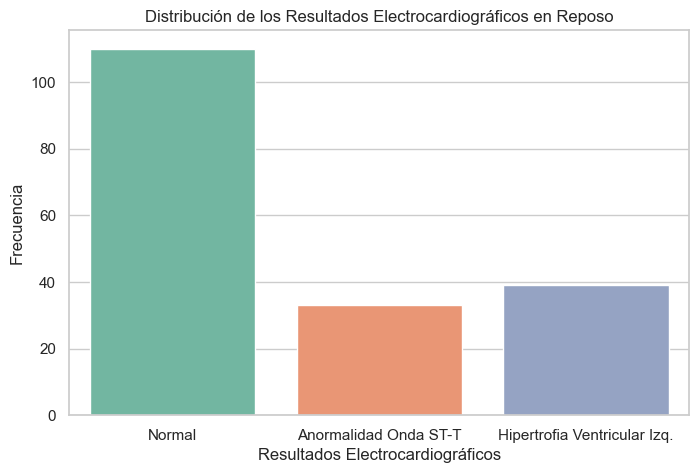

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(8, 5))  # Ajustamos el tamaño del gráfico
ax = sns.countplot(x='restecg', data=test_end, palette='Set2')

# Configuramos los títulos y etiquetas
ax.set_title('Distribución de los Resultados Electrocardiográficos en Reposo')
ax.set_xlabel('Resultados Electrocardiográficos')
ax.set_ylabel('Frecuencia')
ax.set_xticklabels(['Normal', 'Anormalidad Onda ST-T', 'Hipertrofia Ventricular Izq.'])  # Etiquetas personalizadas

# Mostrar el gráfico
plt.show()


## thalach

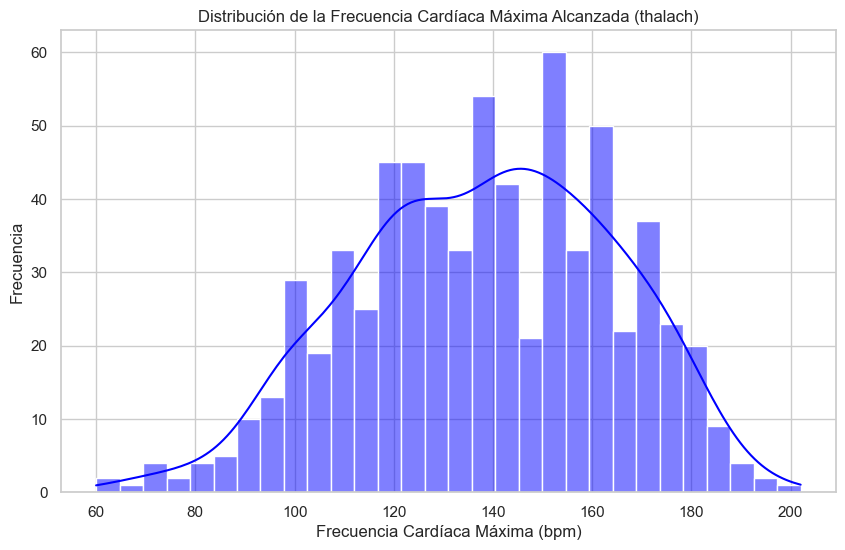

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el histograma
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
sns.histplot(data=train_end, x='thalach', bins=30, kde=True, color='blue')

# Configuramos los títulos y etiquetas
plt.title('Distribución de la Frecuencia Cardíaca Máxima Alcanzada (thalach)')
plt.xlabel('Frecuencia Cardíaca Máxima (bpm)')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()


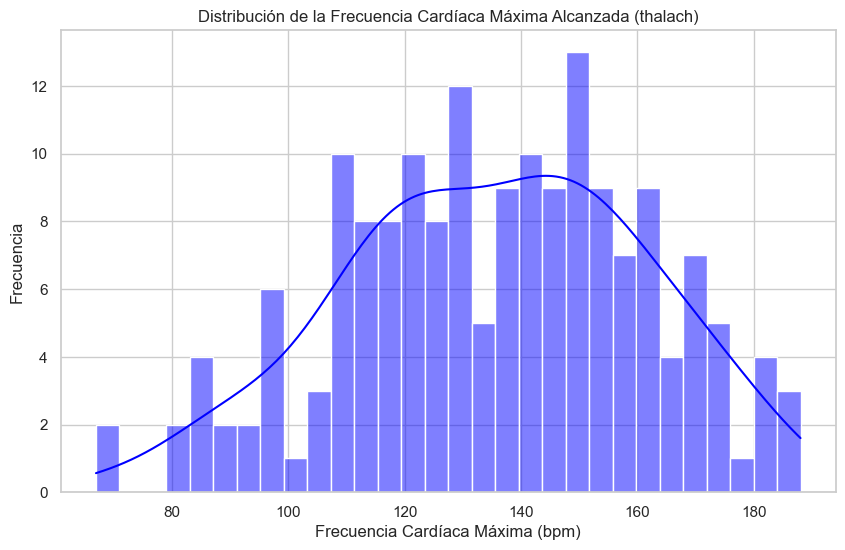

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el histograma
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño del gráfico
sns.histplot(data=test_end, x='thalach', bins=30, kde=True, color='blue')

# Configuramos los títulos y etiquetas
plt.title('Distribución de la Frecuencia Cardíaca Máxima Alcanzada (thalach)')
plt.xlabel('Frecuencia Cardíaca Máxima (bpm)')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()


## EXANG

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3425982930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='exang', data=train_end, palette='Set1')
C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3425982930.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])  # Etiquetas personalizadas para 0 y 1


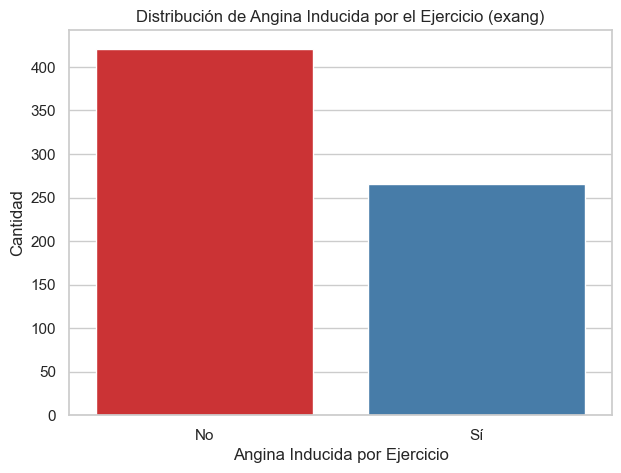

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(7, 5))  # Ajustamos el tamaño del gráfico
ax = sns.countplot(x='exang', data=train_end, palette='Set1')

# Configuramos los títulos y etiquetas
ax.set_title('Distribución de Angina Inducida por el Ejercicio (exang)')
ax.set_xlabel('Angina Inducida por Ejercicio')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(['No', 'Sí'])  # Etiquetas personalizadas para 0 y 1

# Mostrar el gráfico
plt.show()


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2779104626.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='exang', data=test_end, palette='Set1')
C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2779104626.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Sí'])  # Etiquetas personalizadas para 0 y 1


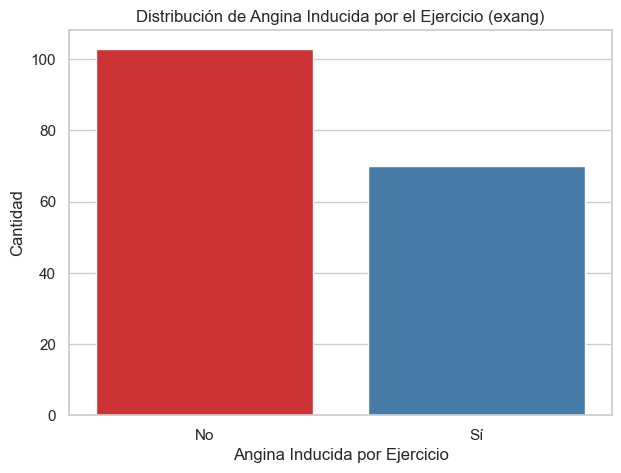

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Creamos el gráfico de barras
plt.figure(figsize=(7, 5))  # Ajustamos el tamaño del gráfico
ax = sns.countplot(x='exang', data=test_end, palette='Set1')

# Configuramos los títulos y etiquetas
ax.set_title('Distribución de Angina Inducida por el Ejercicio (exang)')
ax.set_xlabel('Angina Inducida por Ejercicio')
ax.set_ylabel('Cantidad')
ax.set_xticklabels(['No', 'Sí'])  # Etiquetas personalizadas para 0 y 1

# Mostrar el gráfico
plt.show()


## oldpeak

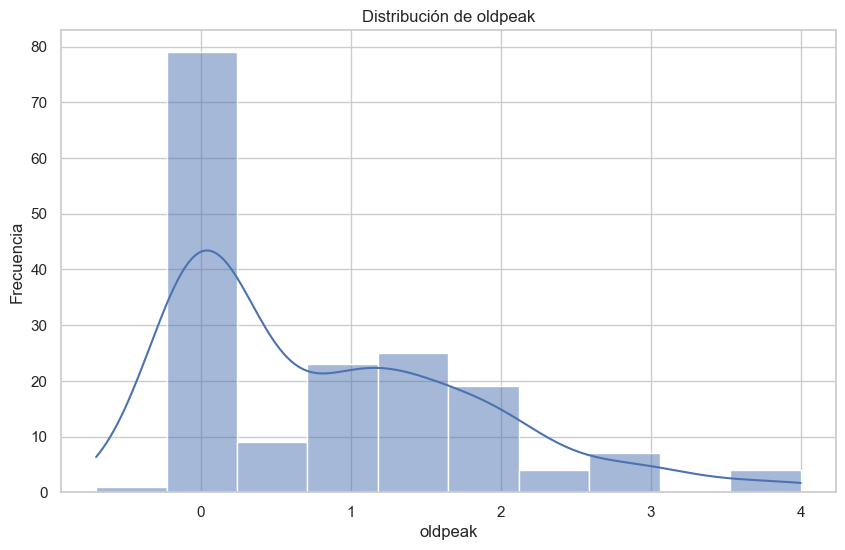

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de 'oldpeak'
plt.figure(figsize=(10, 6))
sns.histplot(data=test_end, x='oldpeak', kde=True, bins=10)
plt.title('Distribución de oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frecuencia')
plt.show()

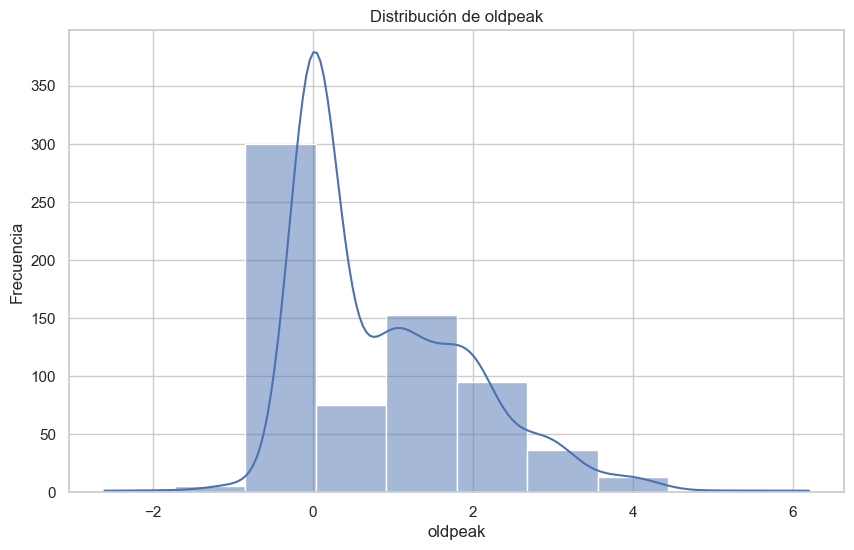

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de 'oldpeak'
plt.figure(figsize=(10, 6))
sns.histplot(data=train_end, x='oldpeak', kde=True, bins=10)
plt.title('Distribución de oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
train_end.isnull().sum()

age           0
sex           0
cp            0
trestbps     47
chol         21
fbs          66
restecg       0
thalach      44
exang        44
oldpeak      49
slope       247
label         0
dtype: int64

In [40]:
test_end.isnull().sum()

age           0
sex           0
cp            0
trestbps     12
chol          9
fbs          23
restecg       2
thalach      11
exang        11
oldpeak      13
slope        61
label       184
dtype: int64

In [41]:
# Paso 1: Calcular la mediana de 'oldpeak' excluyendo los valores negativos
oldpeak_median = train_end['oldpeak'][train_end['oldpeak'] >= 0].median()

# Asegurarse de que los NaN se mantengan
train_end['oldpeak'] = train_end['oldpeak'].apply(lambda x: oldpeak_median if x < 0 and pd.notnull(x) else x)

In [42]:
# Paso 1: Calcular la mediana de 'oldpeak' excluyendo los valores negativos
oldpeak_median = test_end['oldpeak'][test_end['oldpeak'] >= 0].median()

# Asegurarse de que los NaN se mantengan
test_end['oldpeak'] = test_end['oldpeak'].apply(lambda x: oldpeak_median if x < 0 and pd.notnull(x) else x)



C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\1346897552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_end['oldpeak'] = test_end['oldpeak'].apply(lambda x: oldpeak_median if x < 0 and pd.notnull(x) else x)


In [43]:
train_end['oldpeak'] = train_end['oldpeak'].apply(lambda x: min(x, 4.0) if pd.notnull(x) else x)


In [44]:
# Calcular la mediana de 'oldpeak', excluyendo los valores NaN
oldpeak_median = test_end['oldpeak'].median()

# Reemplazar los valores NaN en 'oldpeak' con la mediana
test_end['oldpeak'].fillna(oldpeak_median, inplace=True)

# Verificar si aún hay valores NaN en 'oldpeak'
print(test_end['oldpeak'].isnull().sum())


0


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\1952534018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_end['oldpeak'].fillna(oldpeak_median, inplace=True)


## slope

C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2503625918.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='slope', data=train_end, palette='Set2')
C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2503625918.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Datos Faltantes', 'Ascendente', 'Plano', 'Descendente'])


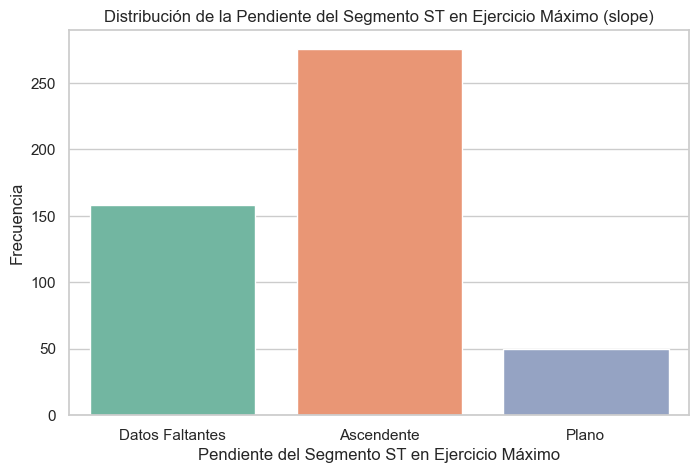

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))  # Ajustar el tamaño del gráfico
ax = sns.countplot(x='slope', data=train_end, palette='Set2')

# Configurar los títulos y etiquetas
ax.set_title('Distribución de la Pendiente del Segmento ST en Ejercicio Máximo (slope)')
ax.set_xlabel('Pendiente del Segmento ST en Ejercicio Máximo')
ax.set_ylabel('Frecuencia')
# Etiquetas personalizadas para 0, 1, 2, 3
ax.set_xticklabels(['Datos Faltantes', 'Ascendente', 'Plano', 'Descendente'])

# Mostrar el gráfico
plt.show()


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2560616332.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='slope', data=test_end, palette='Set2')


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\2560616332.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Datos Faltantes', 'Ascendente', 'Plano', 'Descendente'])


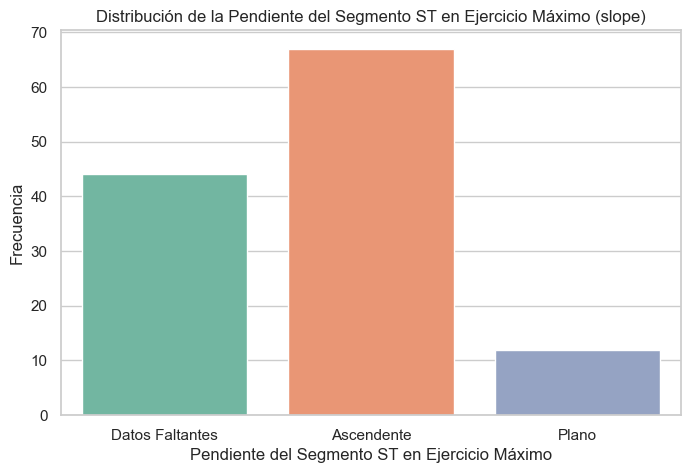

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))  # Ajustar el tamaño del gráfico
ax = sns.countplot(x='slope', data=test_end, palette='Set2')

# Configurar los títulos y etiquetas
ax.set_title('Distribución de la Pendiente del Segmento ST en Ejercicio Máximo (slope)')
ax.set_xlabel('Pendiente del Segmento ST en Ejercicio Máximo')
ax.set_ylabel('Frecuencia')
# Etiquetas personalizadas para 0, 1, 2, 3
ax.set_xticklabels(['Datos Faltantes', 'Ascendente', 'Plano', 'Descendente'])

# Mostrar el gráfico
plt.show()


In [47]:
# Reemplazar los valores NaN en 'slope' con 0
train_end['slope'].fillna(0, inplace=True)

# Verificar si aún hay valores NaN en 'slope'
print(train_end['slope'].isnull().sum())

0


In [48]:
# Reemplazar los valores NaN en 'slope' con 0
test_end['slope'].fillna(0, inplace=True)

# Verificar si aún hay valores NaN en 'slope'
print(test_end['slope'].isnull().sum())

0


C:\Users\Pacotm\AppData\Local\Temp\ipykernel_17696\3594865139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_end['slope'].fillna(0, inplace=True)


In [49]:
train_end.isnull().sum()

age          0
sex          0
cp           0
trestbps    47
chol        21
fbs         66
restecg      0
thalach     44
exang       44
oldpeak     49
slope        0
label        0
dtype: int64

In [50]:
test_end.isnull().sum()

age           0
sex           0
cp            0
trestbps     12
chol          9
fbs          23
restecg       2
thalach      11
exang        11
oldpeak       0
slope         0
label       184
dtype: int64

## ca

**ELIMINADA**

## thal

**ELIMINADA**

## NORMALIZACION 

In [51]:
train_end.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
0,51,1,1,125.0,213.000000,0.0,2.0,125.0,1.0,1.4,1.0,0.0
1,54,1,3,120.0,237.000000,0.0,0.0,150.0,1.0,1.5,0.0,2.0
2,63,1,4,140.0,246.821181,NaN,2.0,149.0,0.0,2.0,1.0,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,0.0,0.0
4,55,1,4,140.0,217.000000,0.0,0.0,111.0,1.0,4.0,3.0,3.0


In [52]:
test_end.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
732,57,1,4,156.0,173.000000,0.0,2.0,119.0,1.0,3.0,3.0,NaN
733,52,1,2,160.0,196.000000,0.0,0.0,165.0,0.0,0.0,0.0,NaN
734,48,1,2,100.0,NaN,0.0,0.0,100.0,0.0,0.0,0.0,NaN
735,62,1,4,115.0,246.582734,NaN,0.0,128.0,1.0,2.5,3.0,NaN
736,51,1,3,110.0,175.000000,0.0,0.0,123.0,0.0,0.6,1.0,NaN


In [53]:
from sklearn.preprocessing import FunctionTransformer

# Crear un objeto StandardScaler
scaler3 = FunctionTransformer()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','trestbps','chol','thalach','oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
train_end[columns_to_scale3] = scaler3.fit_transform(train_end[columns_to_scale3])


In [54]:
train_end

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
0,51,1,1,125.0,213.000000,0.0,2.0,125.0,1.0,1.4,1.0,0.0
1,54,1,3,120.0,237.000000,0.0,0.0,150.0,1.0,1.5,0.0,2.0
2,63,1,4,140.0,246.821181,NaN,2.0,149.0,0.0,2.0,1.0,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,0.0,0.0
4,55,1,4,140.0,217.000000,0.0,0.0,111.0,1.0,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1,3,120.0,230.000000,0.0,0.0,150.0,0.0,0.0,0.0,0.0
728,62,1,3,NaN,204.000000,0.0,1.0,NaN,NaN,NaN,0.0,1.0
729,43,0,3,122.0,213.000000,0.0,0.0,165.0,0.0,0.2,2.0,0.0
730,68,1,3,150.0,195.000000,1.0,0.0,132.0,0.0,0.0,0.0,1.0


In [55]:
test_end

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,label
732,57,1,4,156.0,173.000000,0.0,2.0,119.0,1.0,3.0,3.0,NaN
733,52,1,2,160.0,196.000000,0.0,0.0,165.0,0.0,0.0,0.0,NaN
734,48,1,2,100.0,NaN,0.0,0.0,100.0,0.0,0.0,0.0,NaN
735,62,1,4,115.0,246.582734,NaN,0.0,128.0,1.0,2.5,3.0,NaN
736,51,1,3,110.0,175.000000,0.0,0.0,123.0,0.0,0.6,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
911,54,1,4,200.0,198.000000,0.0,0.0,142.0,1.0,2.0,2.0,NaN
912,55,1,2,110.0,214.000000,1.0,1.0,180.0,0.0,0.6,0.0,NaN
913,67,1,3,152.0,212.000000,0.0,2.0,150.0,0.0,0.8,2.0,NaN
914,59,1,1,170.0,288.000000,0.0,2.0,159.0,0.0,0.2,2.0,NaN


In [56]:
train_end['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    106
4.0     34
Name: label, dtype: int64

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Reinicia los índices de ambos dataframes antes de unirlos
train_end.reset_index(drop=True, inplace=True)
test_end.reset_index(drop=True, inplace=True)

# Unimos los dataframes
combined_df = pd.concat([train_end, test_end], axis=0).reset_index(drop=True)

# Aplicamos la imputación
mice_imputer = IterativeImputer()
imputed_data = mice_imputer.fit_transform(combined_df.drop(columns='label'))

# Convertimos de nuevo a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=combined_df.drop(columns='label').columns)

# Reasignamos 'label' porque no la imputamos
imputed_df['label'] = combined_df['label'].values

# Ahora, separamos los dataframes utilizando la longitud de los originales
train_end_imputed = imputed_df.iloc[:len(train_end)]
test_end_imputed = imputed_df.iloc[len(train_end):]

# Verificamos que las dimensiones son correctas
assert len(train_end_imputed) == len(train_end)
assert len(test_end_imputed) == len(test_end)


In [58]:
train_end_imputed.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
label       0
dtype: int64

In [59]:
test_end_imputed.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
label       184
dtype: int64

In [60]:
train_end_imputed.shape

(731, 12)

In [61]:
test_end_imputed.shape

(184, 12)

## MODELO

In [62]:
from sklearn.model_selection import train_test_split

X4 = train_end_imputed.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end_imputed['label']




In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Instanciar LDA
lda = LDA()

# Ajustar el modelo: Esto encuentra la dirección de proyección que maximiza la separación entre las clases
X_lda = lda.fit_transform(X4, Y4)  # Asegúrate de que 'X' son tus características y 'Y' tus etiquetas

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X_lda, Y4, test_size=0.125, random_state=42)



In [64]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# Instanciar los modelos individuales
log_clf = LogisticRegression()
svm_clf = SVC(probability=True)
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()
gnb_clf = GaussianNB()
adb_clf = AdaBoostClassifier()
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
ext_clf = ExtraTreesClassifier()
bag_clf = BaggingClassifier()
lgbm_clf = LGBMClassifier()
cat_clf = CatBoostClassifier(verbose=0)  # desactivar la salida por defecto para evitar logs largos

# Crear un VotingClassifier con una combinación ampliada de modelos
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svm_clf),
        ('dt', dt_clf),
        ('knn', knn_clf),
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('gnb', gnb_clf),
        ('adb', adb_clf),
        ('xgb', xgb_clf),
        ('ext', ext_clf),
        ('bag', bag_clf),
        ('lgbm', lgbm_clf),
        ('cat', cat_clf),
    ],
    voting='soft'
)

# Entrenar el ensamble
voting_clf.fit(X4_train, Y4_train)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report

# Predicciones y evaluación para cada clasificador individual y el clasificador de votación
for clf in (log_clf, svm_clf, dt_clf, knn_clf, rf_clf, gb_clf, gnb_clf, adb_clf, xgb_clf, ext_clf, bag_clf, lgbm_clf, cat_clf, voting_clf):
    clf.fit(X4_train, Y4_train)
    y_pred = clf.predict(X4_val)
    print(f'{clf.__class__.__name__} Accuracy: {accuracy_score(Y4_val, y_pred):.4f}')
    print(f'{clf.__class__.__name__} Classification Report:\n{classification_report(Y4_val, y_pred)}')


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 4
[LightGBM] [Info] Start training from score -0.807415
[LightGBM] [Info] Start training from score -1.525431
[LightGBM] [Info] Start training from score -1.864785
[LightGBM] [Info] Start training from score -1.960095
[LightGBM] [Info] Start training from score -3.201808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

RandomForestClassifier Accuracy: 0.4457
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75        42
         1.0       0.32      0.35      0.33        17
         2.0       0.00      0.00      0.00         9
         3.0       0.09      0.06      0.07        16
         4.0       0.00      0.00      0.00         8

    accuracy                           0.45        92
   macro avg       0.22      0.24      0.23        92
weighted avg       0.39      0.45      0.42        92

GradientBoostingClassifier Accuracy: 0.4239
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76        42
         1.0       0.14      0.12      0.13        17
         2.0       0.06      0.11      0.08         9
         3.0       0.10      0.06      0.08        16
         4.0       0.20      0.12      0.15         8

    a

c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


XGBClassifier Accuracy: 0.5000
XGBClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.83      0.80        42
         1.0       0.21      0.18      0.19        17
         2.0       0.08      0.11      0.09         9
         3.0       0.40      0.38      0.39        16
         4.0       0.25      0.12      0.17         8

    accuracy                           0.50        92
   macro avg       0.34      0.32      0.33        92
weighted avg       0.49      0.50      0.49        92

ExtraTreesClassifier Accuracy: 0.4674
ExtraTreesClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.76      0.72        42
         1.0       0.30      0.35      0.32        17
         2.0       0.00      0.00      0.00         9
         3.0       0.31      0.31      0.31        16
         4.0       0.00      0.00      0.00         8

    accuracy                       

c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 854
[LightGBM] [Info] Number of data points in the train set: 639, number of used features: 4
[LightGBM] [Info] Start training from score -0.807415
[LightGBM] [Info] Start training from score -1.525431
[LightGBM] [Info] Start training from score -1.864785
[LightGBM] [Info] Start training from score -1.960095
[LightGBM] [Info] Start training from score -3.201808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [65]:
# Aplica la misma transformación LDA a los datos de prueba
test_end4_sin_label = test_end_imputed.drop('label', axis=1)
X_test_lda = lda.transform(test_end4_sin_label)  # Transformar características del conjunto de prueb

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = voting_clf.predict(X_test_lda)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = voting_clf.predict_proba(X_test_lda)


In [66]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end_imputed.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())


      age  sex   cp  trestbps        chol       fbs  restecg  thalach  exang  \
731  57.0  1.0  4.0     156.0  173.000000  0.000000      2.0    119.0    1.0   
732  52.0  1.0  2.0     160.0  196.000000  0.000000      0.0    165.0    0.0   
733  48.0  1.0  2.0     100.0  240.889660  0.000000      0.0    100.0    0.0   
734  62.0  1.0  4.0     115.0  246.582734  0.174917      0.0    128.0    1.0   
735  51.0  1.0  3.0     110.0  175.000000  0.000000      0.0    123.0    0.0   

     oldpeak  slope  label  
731      3.0    3.0    3.0  
732      0.0    0.0    0.0  
733      0.0    0.0    0.0  
734      2.5    3.0    3.0  
735      0.6    1.0    0.0  


In [67]:
predicted_df4['label'].value_counts()

0.0    84
1.0    46
2.0    27
3.0    26
4.0     1
Name: label, dtype: int64

In [68]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('tryX_data.csv', index=False)


In [69]:
df55best = pd.read_csv('try56best_data.csv')
dfactualtry = pd.read_csv('tryX_data.csv')

In [70]:
difference = df55best['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

     self  other
0     2.0    3.0
3     1.0    3.0
7     0.0    2.0
11    2.0    3.0
14    1.0    0.0
..    ...    ...
172   0.0    1.0
173   0.0    2.0
179   2.0    0.0
181   0.0    1.0
183   1.0    2.0

[74 rows x 2 columns]


In [71]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 74
